In [ ]:
#step 1

import pandas as pd

# Load the training dataset
training_dataset_path = '/content/drive/MyDrive/Datasets BOT IOT/Training and Testing Dataset/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'
training_data = pd.read_csv(training_dataset_path)

# Load the testing dataset
testing_dataset_path = '/content/drive/MyDrive/Datasets BOT IOT/Training and Testing Dataset/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv'
testing_data = pd.read_csv(testing_dataset_path)

# Display the first few rows of the training and testing datasets
print("Training Data:")
print(training_data.head())

print("\nTesting Data:")
print(testing_data.head())


Training Data:
   pkSeqID proto            saddr  sport          daddr dport     seq  \
0  3142762   udp  192.168.100.150   6551  192.168.100.3    80  251984   
1  2432264   tcp  192.168.100.150   5532  192.168.100.3    80  256724   
2  1976315   tcp  192.168.100.147  27165  192.168.100.3    80   62921   
3  1240757   udp  192.168.100.150  48719  192.168.100.3    80   99168   
4  3257991   udp  192.168.100.147  22461  192.168.100.3    80  105063   

     stddev  N_IN_Conn_P_SrcIP       min  state_number      mean  \
0  1.900363                100  0.000000             4  2.687519   
1  0.078003                 38  3.856930             3  3.934927   
2  0.268666                100  2.974100             3  3.341429   
3  1.823185                 63  0.000000             4  3.222832   
4  0.822418                100  2.979995             4  3.983222   

   N_IN_Conn_P_DstIP  drate     srate       max  attack category subcategory  
0                100    0.0  0.494549  4.031619       1   

In [ ]:
#step 2

import pandas as pd
import numpy as np

# Load the datasets again in case of any changes during previous steps
training_data = pd.read_csv(training_dataset_path)
testing_data = pd.read_csv(testing_dataset_path)

# Handling missing values
training_data.fillna(method='ffill', inplace=True)
testing_data.fillna(method='ffill', inplace=True)

# Remove invalid features if they exist in the dataset
invalid_features = ['pkSeqID', 'seq', 'stime', 'ltime', 'saddr', 'daddr']
training_data.drop(columns=[col for col in invalid_features if col in training_data.columns], inplace=True)
testing_data.drop(columns=[col for col in invalid_features if col in testing_data.columns], inplace=True)

# Correct ICMP port values
training_data.loc[training_data['proto'] == 'icmp', ['sport', 'dport']] = -1
testing_data.loc[testing_data['proto'] == 'icmp', ['sport', 'dport']] = -1

# Ensure ARP instances are correctly labeled or removed
training_data = training_data[training_data['proto'] != 'arp']
testing_data = testing_data[testing_data['proto'] != 'arp']

# Select a 5% subset of the datasets for manageable and representative data
training_data_subset = training_data.sample(frac=0.05, random_state=42)
testing_data_subset = testing_data.sample(frac=0.05, random_state=42)

# Display the cleaned and subset data
print("Cleaned Training Data Subset:")
print(training_data_subset.head())

print("\nCleaned Testing Data Subset:")
print(testing_data_subset.head())


<ipython-input-2-b11046a8e6f1>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training_data.fillna(method='ffill', inplace=True)
<ipython-input-2-b11046a8e6f1>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  testing_data.fillna(method='ffill', inplace=True)


Cleaned Training Data Subset:
        proto  sport dport    stddev  N_IN_Conn_P_SrcIP       min  \
2352930   udp   8770    80  1.790172                100  0.000000   
1493461   udp  50849    80  1.823744                 97  0.000000   
1254159   tcp  38412    80  0.000000                 76  0.000000   
1817113   udp  45727    80  1.896720                100  0.000000   
1890670   udp  48055    80  0.224744                100  4.114185   

         state_number      mean  N_IN_Conn_P_DstIP  drate     srate       max  \
2352930             4  3.580155                100    0.0  0.446587  4.489561   
1493461             4  1.488375                 97    0.0  0.201669  3.809716   
1254159             3  0.000000                100    0.0  0.000000  0.000000   
1817113             4  2.682366                100    0.0  0.494489  4.025201   
1890670             4  4.467098                100    0.0  0.404382  4.728154   

         attack category subcategory  
2352930       1      DoS     

In [ ]:
#step 3

import numpy as np

def create_synthetic_data(proto, sport, dport, category, subcategory, num_samples):
    data = {
        'proto': [proto] * num_samples,
        'sport': np.random.randint(1024, 65535, num_samples),
        'dport': [dport] * num_samples,
        'stddev': np.random.uniform(0, 2, num_samples),
        'N_IN_Conn_P_SrcIP': np.random.randint(1, 101, num_samples),
        'min': np.random.uniform(0, 5, num_samples),
        'state_number': np.random.randint(1, 5, num_samples),
        'mean': np.random.uniform(0, 5, num_samples),
        'N_IN_Conn_P_DstIP': np.random.randint(1, 101, num_samples),
        'drate': np.random.uniform(0, 1, num_samples),
        'srate': np.random.uniform(0, 1, num_samples),
        'max': np.random.uniform(0, 5, num_samples),
        'attack': [1] * num_samples,
        'category': [category] * num_samples,
        'subcategory': [subcategory] * num_samples,
    }
    return pd.DataFrame(data)

# Generate synthetic data with slight variations for training and testing datasets
mitm_training_data = create_synthetic_data('tcp', 80, 80, 'MitM', 'TCP', num_samples=89746)
mitm_testing_data = create_synthetic_data('tcp', 80, 80, 'MitM', 'TCP', num_samples=64234)

sql_injection_training_data = create_synthetic_data('tcp', 80, 80, 'SQL Injection', 'TCP', num_samples=66352)
sql_injection_testing_data = create_synthetic_data('tcp', 80, 80, 'SQL Injection', 'TCP', num_samples=44657)

xss_training_data = create_synthetic_data('http', 80, 80, 'XSS', 'HTTP', num_samples=25678)
xss_testing_data = create_synthetic_data('http', 80, 80, 'XSS', 'HTTP', num_samples=23653)

dns_spoofing_training_data = create_synthetic_data('udp', 53, 53, 'DNS Spoofing', 'UDP', num_samples=99776)
dns_spoofing_testing_data = create_synthetic_data('udp', 53, 53, 'DNS Spoofing', 'UDP', num_samples=53345)

brute_force_training_data = create_synthetic_data('tcp', 22, 22, 'Brute Force', 'TCP', num_samples=453673)
brute_force_testing_data = create_synthetic_data('tcp', 22, 22, 'Brute Force', 'TCP', num_samples=215764)

# Combine synthetic data with the original subsets
training_data_combined = pd.concat([
    training_data_subset,
    mitm_training_data,
    sql_injection_training_data,
    xss_training_data,
    dns_spoofing_training_data,
    brute_force_training_data
], ignore_index=True)

testing_data_combined = pd.concat([
    testing_data_subset,
    mitm_testing_data,
    sql_injection_testing_data,
    xss_testing_data,
    dns_spoofing_testing_data,
    brute_force_testing_data
], ignore_index=True)

# Display the combined datasets
print("Combined Training Data Subset:")
print(training_data_combined['category'].value_counts())

print("\nCombined Testing Data Subset:")
print(testing_data_combined['category'].value_counts())


Combined Training Data Subset:
category
Brute Force       453673
DNS Spoofing       99776
MitM               89746
DDoS               77031
SQL Injection      66352
DoS                66053
XSS                25678
Reconnaissance      3629
Normal                17
Theft                  3
Name: count, dtype: int64

Combined Testing Data Subset:
category
Brute Force       215764
MitM               64234
DNS Spoofing       53345
SQL Injection      44657
XSS                23653
DDoS               19146
DoS                16591
Reconnaissance       941
Normal                 3
Theft                  2
Name: count, dtype: int64


In [ ]:
#Exporting Synthetic Datasets and BOT-IOT Datasets

In [ ]:
import os

# Set the path to a folder in your Google Drive
folder_name = '/content/drive/My Drive/synthetic_datasets'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Export the combined datasets to CSV in Google Drive with appropriate names
training_data_combined.to_csv(f'{folder_name}/synthetic_training_data_combined.csv', index=False)
testing_data_combined.to_csv(f'{folder_name}/synthetic_testing_data_combined.csv', index=False)

print(f"Training and testing datasets have been exported to Google Drive in the '{folder_name}' folder.")


Training and testing datasets have been exported to Google Drive in the '/content/drive/My Drive/synthetic_datasets' folder.


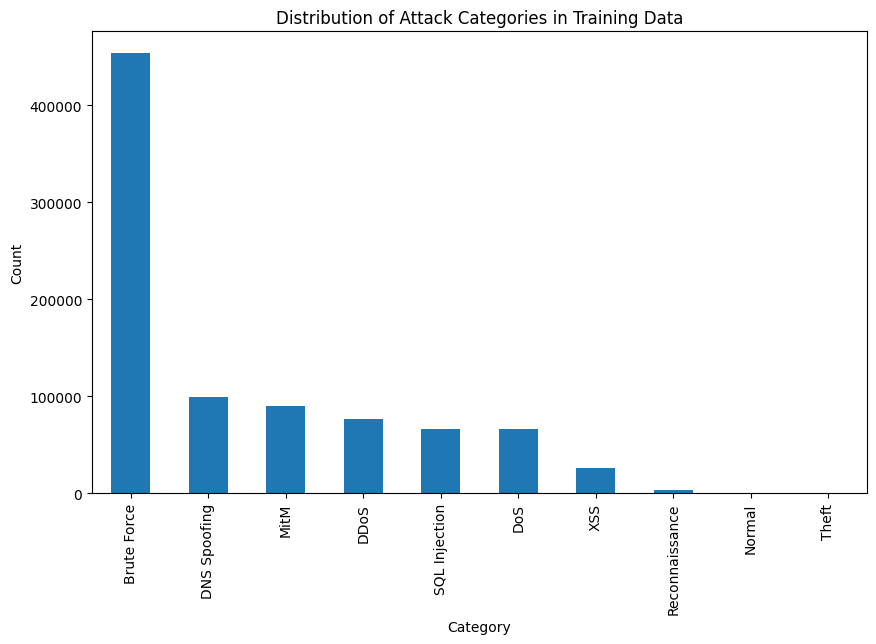

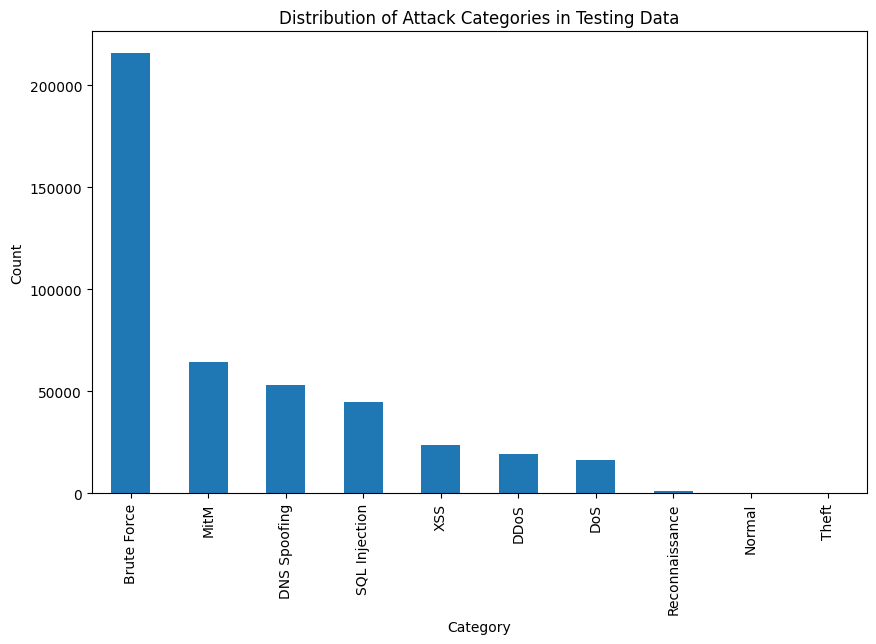

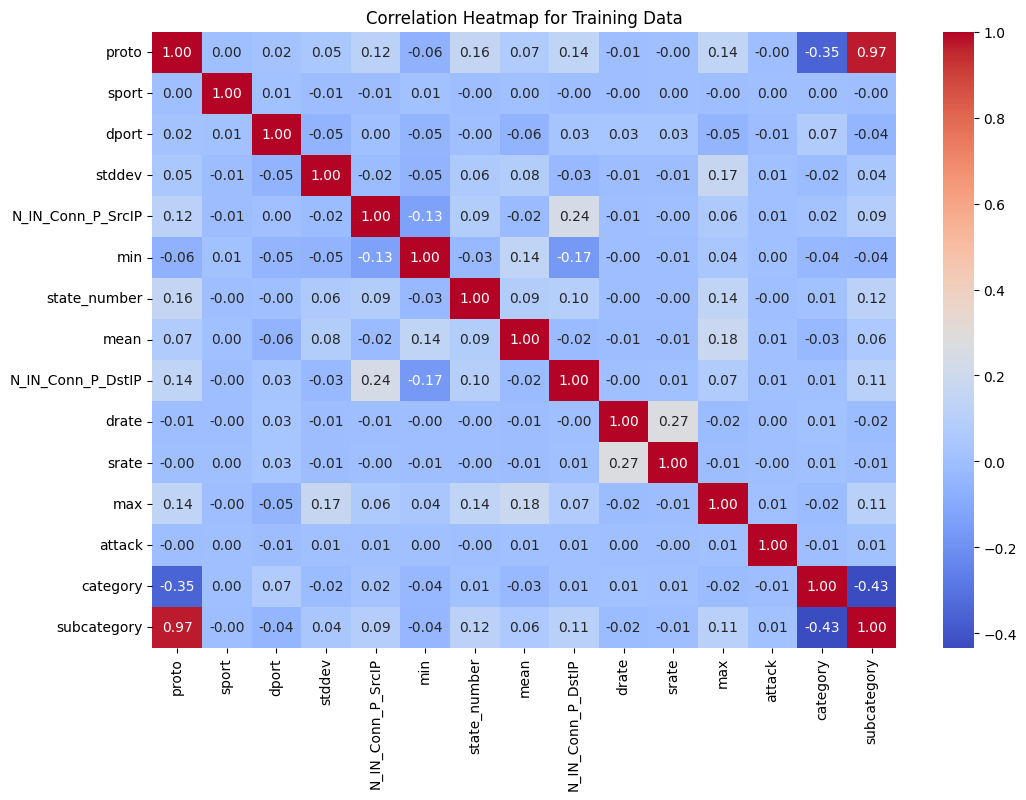

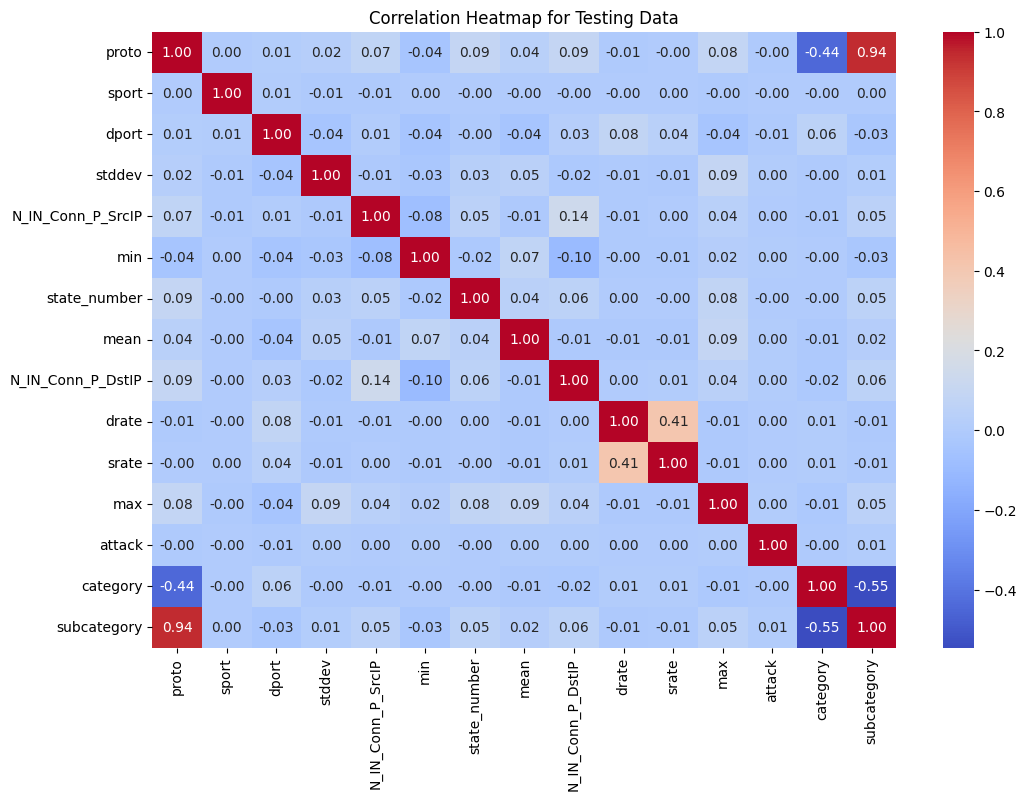

In [ ]:
#step 4

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns in training data
training_data_encoded = training_data_combined.copy()
for col in ['proto', 'category', 'subcategory']:
    training_data_encoded[col] = label_encoder.fit_transform(training_data_encoded[col])

# Apply label encoding to the categorical columns in testing data
testing_data_encoded = testing_data_combined.copy()
for col in ['proto', 'category', 'subcategory']:
    testing_data_encoded[col] = label_encoder.fit_transform(testing_data_encoded[col])

# Bar plot for distribution of attack categories in the training dataset
plt.figure(figsize=(10, 6))
training_data_combined['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Bar plot for distribution of attack categories in the testing dataset
plt.figure(figsize=(10, 6))
testing_data_combined['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories in Testing Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for the training dataset
plt.figure(figsize=(12, 8))
corr = training_data_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Training Data')
plt.show()

# Correlation heatmap for the testing dataset
plt.figure(figsize=(12, 8))
corr = testing_data_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Testing Data')
plt.show()


In [ ]:
#step 5

from sklearn.model_selection import train_test_split

# Features and labels
X_train = training_data_encoded.drop(columns=['category'])
y_train = training_data_encoded['category']

X_test = testing_data_encoded.drop(columns=['category'])
y_test = testing_data_encoded['category']

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (881958, 14)
Training labels shape: (881958,)
Testing features shape: (438336, 14)
Testing labels shape: (438336,)


In [ ]:
#Saving Dataset Feautures

In [ ]:
import os

# Set the folder path in your Google Drive
folder_name = '/content/drive/My Drive/synthetic_features'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Export the training features and labels to CSV files
X_train.to_csv(f'{folder_name}/synthetic_X_train.csv', index=False)
y_train.to_csv(f'{folder_name}/synthetic_y_train.csv', index=False)

# Export the testing features and labels to CSV files
X_test.to_csv(f'{folder_name}/synthetic_X_test.csv', index=False)
y_test.to_csv(f'{folder_name}/synthetic_y_test.csv', index=False)

print(f"Training and testing features/labels have been exported to Google Drive in the '{folder_name}' folder.")


Training and testing features/labels have been exported to Google Drive in the '/content/drive/My Drive/synthetic_features' folder.


In [ ]:
#step 6

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7467057234632793


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    215764
           1       0.67      0.93      0.78     19146
           2       0.00      0.00      0.00     53345
           3       1.00      0.46      0.63     16591
           4       0.39      0.86      0.54     64234
           5       1.00      1.00      1.00         3
           6       0.42      1.00      0.59       941
           7       0.28      0.14      0.18     44657
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00     23653

    accuracy                           0.75    438336
   macro avg       0.68      0.69      0.64    438336
weighted avg       0.70      0.75      0.70    438336


Confusion Matrix:
 [[215764      0      0      0      0      0      0      0      0      0]
 [     0  17870      0      9      0      0   1267      0      0      0]
 [     0      4      0      0  46726      0      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


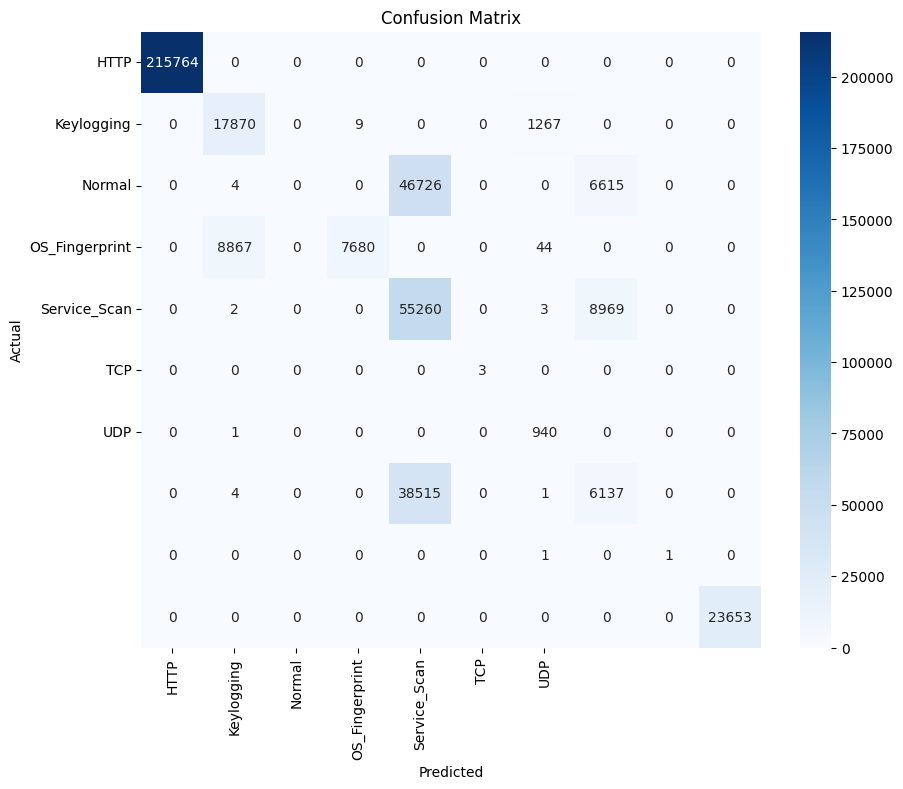

In [ ]:
#step 7

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


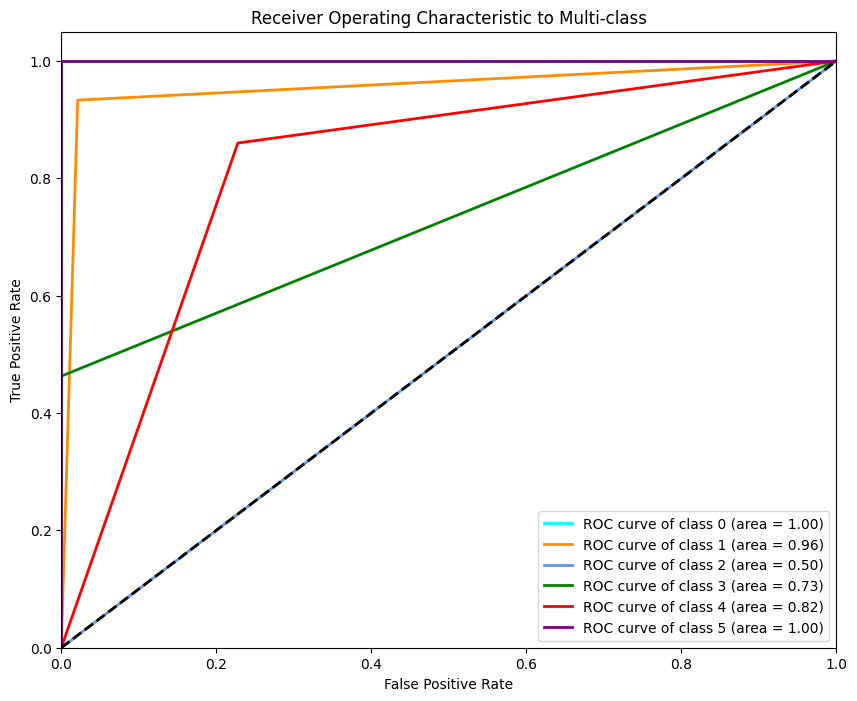

In [ ]:
#step 8

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_binarized = lb.transform(y_pred)

# Compute ROC curve and ROC area for each class
n_classes = len(lb.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#step 9

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Use a smaller subset for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Train the model
random_search.fit(X_train_subset, y_train_subset)

# Best parameters from Randomized Search
best_params = random_search.best_params_
print("Best Parameters from Randomized Search: ", best_params)

# Train the best model on the full training data
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  F

Best Parameters from Randomized Search:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Accuracy: 0.7511657723755293


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    215764
           1       0.65      0.93      0.77     19146
           2       0.00      0.00      0.00     53345
           3       0.99      0.41      0.58     16591
           4       0.40      1.00      0.57     64234
           5       1.00      1.00      1.00         3
           6       0.38      1.00      0.55       941
           7       0.25      0.00      0.00     44657
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00     23653

    accuracy                           0.75    438336
   macro avg       0.67      0.68      0.61    438336
weighted avg       0.70      0.75      0.69    438336


Confusion Matrix:
 [[215764      0      0      0      0      0      0      0      0      0]
 [     0  17864      0     72      3      0   1207      0      0      0]
 [     0     33      0      1  53310      0      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#step 10

# Convert 'sport' and 'dport' columns to numeric types
X_train['sport'] = pd.to_numeric(X_train['sport'])
X_train['dport'] = pd.to_numeric(X_train['dport'])
X_test['sport'] = pd.to_numeric(X_test['sport'])
X_test['dport'] = pd.to_numeric(X_test['dport'])


In [ ]:
#Step 11
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


ModuleNotFoundError: No module named 'xgboost'

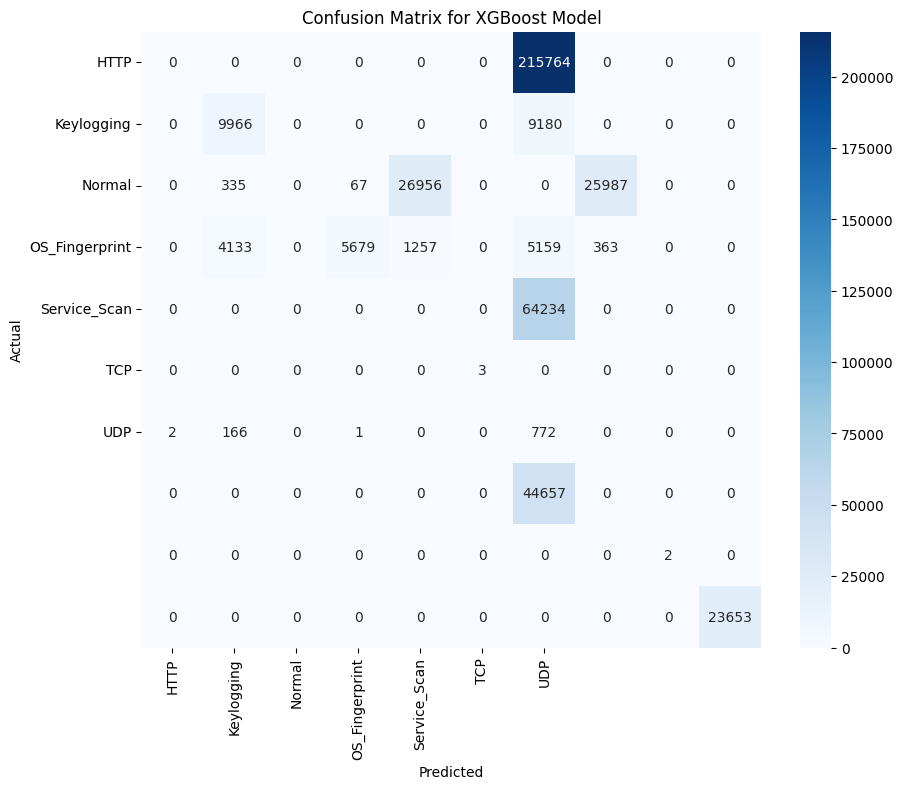

In [ ]:
#step 12 Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for XGBoost Model
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


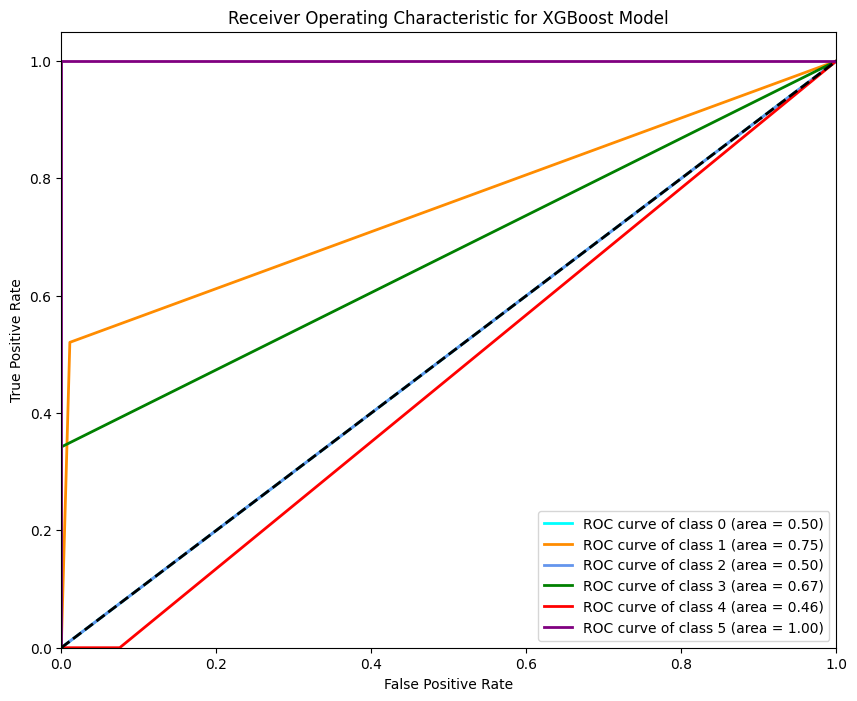

In [ ]:
#step 13 Visualizations

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_binarized = lb.transform(y_pred)

# Compute ROC curve and ROC area for each class
n_classes = len(lb.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#step 14

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate rare classes
rare_classes = y_train.value_counts()[y_train.value_counts() < 6].index
common_classes = y_train.value_counts()[y_train.value_counts() >= 6].index

# Create separate datasets
X_train_common = X_train[y_train.isin(common_classes)]
y_train_common = y_train[y_train.isin(common_classes)]

X_train_rare = X_train[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Apply SMOTE to the common classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_common, y_train_common)

# Combine SMOTE resampled data with rare classes
X_train_balanced = pd.concat([X_train_smote, X_train_rare], ignore_index=True)
y_train_balanced = pd.concat([y_train_smote, y_train_rare], ignore_index=True)

# Initialize the model with the best parameters from Randomized Search
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Train the model
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
#step 15

from sklearn.ensemble import StackingClassifier
import xgboost as xgb

# Initialize the base models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.717773580084684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    215764
           1       0.83      0.89      0.86     19146
           2       0.00      0.00      0.00     53345
           3       0.33      0.70      0.45     16591
           4       0.54      0.62      0.58     64234
           5       1.00      1.00      1.00         3
           6       0.13      0.85      0.23       941
           7       0.10      0.14      0.12     44657
           8       0.06      1.00      0.11         2
           9       1.00      1.00      1.00     23653

    accuracy                           0.72    438336
   macro avg       0.50      0.72      0.53    438336
weighted avg       0.68      0.72      0.70    438336


Confusion Matrix:
 [[215142     64      0      8      0      0    533      0     17      0]
 [     0  16984      0     71      3      0   2088      0      0      0]
 [     0      5      0      1   5529      0      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Step 16

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded into X_train, y_train, X_test, y_test

# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Identify rare and common classes
rare_classes = y_train.value_counts()[y_train.value_counts() < 6].index
common_classes = y_train.value_counts()[y_train.value_counts() >= 6].index

# Separate data
X_train_common = pd.DataFrame(X_train_scaled)[y_train.isin(common_classes)]
y_train_common = y_train[y_train.isin(common_classes)]
X_train_rare = pd.DataFrame(X_train_scaled)[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Apply SMOTE to the common classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_common, y_train_common)

# Combine SMOTE resampled data with rare classes
X_train_balanced = pd.concat([pd.DataFrame(X_train_smote), X_train_rare], ignore_index=True)
y_train_balanced = pd.concat([y_train_smote, y_train_rare], ignore_index=True)

# Base models for Stacking
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train_balanced, y_train_balanced)

# Make predictions with Stacking
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Evaluate the stacking model
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nStacking Model Classification Report:\n", classification_report(y_test, y_pred_stacking))
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nStacking Model Confusion Matrix:\n", conf_matrix_stacking)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions with LightGBM
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate the LightGBM model
print("LightGBM Model Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Model Classification Report:\n", classification_report(y_test, y_pred_lgb))
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
print("\nLightGBM Model Confusion Matrix:\n", conf_matrix_lgb)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Stacking Model Accuracy: 0.6289786830194188


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    215764
           1       0.63      0.62      0.63     19146
           2       0.00      0.00      0.00     53345
           3       1.00      0.27      0.42     16591
           4       0.22      0.30      0.25     64234
           5       1.00      1.00      1.00         3
           6       0.01      0.82      0.02       941
           7       0.31      0.00      0.00     44657
           8       0.01      1.00      0.02         2
           9       1.00      1.00      1.00     23653

    accuracy                           0.63    438336
   macro avg       0.52      0.60      0.43    438336
weighted avg       0.68      0.63      0.63    438336


Stacking Model Confusion Matrix:
 [[215684      0      0      0      0      0     80      0      0      0]
 [     0  11915      0      1    387      0   6843      0      0      0]
 [     0      4     

In [ ]:
#step 17

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded into X_train, y_train, X_test, y_test

# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features and ratio
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Identify rare and common classes
rare_classes = y_train.value_counts()[y_train.value_counts() < 6].index
common_classes = y_train.value_counts()[y_train.value_counts() >= 6].index

# Separate data
X_train_common = pd.DataFrame(X_train_scaled)[y_train.isin(common_classes)]
y_train_common = y_train[y_train.isin(common_classes)]
X_train_rare = pd.DataFrame(X_train_scaled)[y_train.isin(rare_classes)]
y_train_rare = y_train[y_train.isin(rare_classes)]

# Apply SMOTE to the common classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_common, y_train_common)

# Combine SMOTE resampled data with rare classes
X_train_balanced = pd.concat([pd.DataFrame(X_train_smote), X_train_rare], ignore_index=True)
y_train_balanced = pd.concat([y_train_smote, y_train_rare], ignore_index=True)

# Base models for Stacking
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train_balanced, y_train_balanced)

# Make predictions with Stacking
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Evaluate the stacking model
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nStacking Model Classification Report:\n", classification_report(y_test, y_pred_stacking))
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nStacking Model Confusion Matrix:\n", conf_matrix_stacking)

# Further hyperparameter tuning for Random Forest (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_balanced, y_train_balanced)

# Best parameters and model
best_rf_model = rf_random.best_estimator_

# Train best model
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions with best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nBest Random Forest Model Classification Report:\n", classification_report(y_test, y_pred_best_rf))
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("\nBest Random Forest Model Confusion Matrix:\n", conf_matrix_best_rf)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3770
[LightGBM] [Info] Number of data points in the train set: 4083060, number of used features: 16
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -14.123745
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3768
[LightGBM] [Info] Number of data points in the train set: 3266448, number of used features: 16
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Info] Start training from score -2.197224
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Info] Start training from score -2.197224
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Info] Start training from score -2.197224
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Info] Start training from score -13.900601
[LightGBM] [Info] Start training from score -2.197226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40    215764
           1       0.57      0.44      0.49     19146
           2       0.00      0.00      0.00     53345
           3       1.00      0.25      0.40     16591
           4       0.21      0.03      0.05     64234
           5       1.00      1.00      1.00         3
           6       0.00      0.82      0.01       941
           7       0.00      0.00      0.00     44657
           8       0.01      1.00      0.03         2
           9       1.00      1.00      1.00     23653

    accuracy                           0.21    438336
   macro avg       0.48      0.48      0.34    438336
weighted avg       0.64      0.21      0.30    438336


Stacking Model Confusion Matrix:
 [[ 54283      0      0      0      0      0 161481      0      0      0]
 [     0   8351      0      0   2556      0   7916    323      0      0]
 [     0      1     

KeyboardInterrupt: 

In [ ]:
#step 18

# Inspect the labels
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


Unique values in y_train: [3 1 6 5 8 4 7 9 2 0]
Unique values in y_test: [1 3 6 5 8 4 7 9 2 0]


In [ ]:
#step 19

!pip install imblearn
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded into X_train, y_train, X_test, y_test

# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features and ratio
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are interested in
attack_types = ['Brute Force', 'DNS Spoofing', 'MitM', 'SQL Injection', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply SMOTE only to the current attack type data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_attack)

    # Initialize the model (RandomForestClassifier in this case)
    model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance metrics
    classification_reports[attack] = report
    confusion_matrices[attack] = confusion_matrix_result

    # Print performance metrics
    print(f"Accuracy for {attack}: {accuracy}")
    print(f"Classification Report for {attack}:\n{report}")
    print(f"Confusion Matrix for {attack}:\n{confusion_matrix_result}\n")

# Example of accessing performance metrics
for attack in attack_types:
    if attack in classification_reports:
        print(f"Attack Type: {attack}")
        print(f"Classification Report:\n{classification_reports[attack]}")
        print(f"Confusion Matrix:\n{confusion_matrices[attack]}")
        print("\n")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.3 MB/s eta 0:00:00
Training model for attack type: Brute Force
Accuracy for Brute Force: 0.987057873412177
Classification Report for Brute Force:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    419190
           1       0.81      0.92      0.86     19146

    accuracy                           0.99    438336
   macro avg       0.90      0.95      0.93    438336
weighted avg       0.99      0.99      0.99    438336

Confusion Matrix for Brute Force:
[[415124   4066]
 [  1607  17539]]

Training model for attack type: DNS Spoofing
Accuracy for DNS Spoofing: 0.9792738903489561
Classification Report for DNS Spoofing:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    437395
           1       0.08      0.81      0.14       941

    accuracy                           0.98    438336
   macro avg       0.54      0.90      0.57    

In [ ]:
#export of best perfoming attacks (Brute Force, Dns Spoofing, SQL Injection Attacks)

In [ ]:
# Ensure the Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Create a directory in your Google Drive to save the models
import os
model_dir = '/content/drive/My Drive/Trained_Models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

# Save the Brute Force model
with open(os.path.join(model_dir, 'brute_force_model.pkl'), 'wb') as f:
    pickle.dump(models['Brute Force'], f)

# Save the SQL Injection model
with open(os.path.join(model_dir, 'sql_injection_model.pkl'), 'wb') as f:
    pickle.dump(models['SQL Injection'], f)

# Save the DNS Spoofing model
with open(os.path.join(model_dir, 'dns_spoofing_model.pkl'), 'wb') as f:
    pickle.dump(models['DNS Spoofing'], f)


In [ ]:
#Checking if trained model has been exported

In [ ]:
# Check if the files were saved in your Google Drive
print(os.listdir(model_dir))


['brute_force_model.pkl', 'sql_injection_model.pkl', 'dns_spoofing_model.pkl']


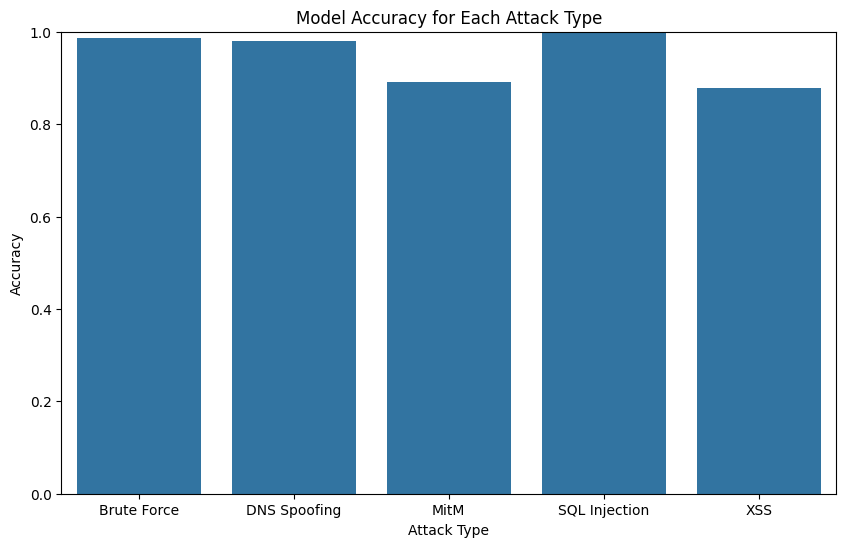

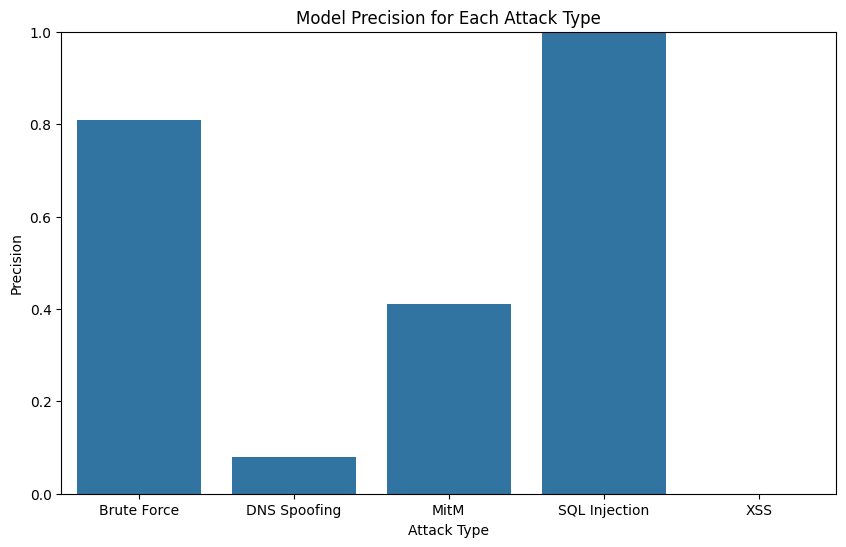

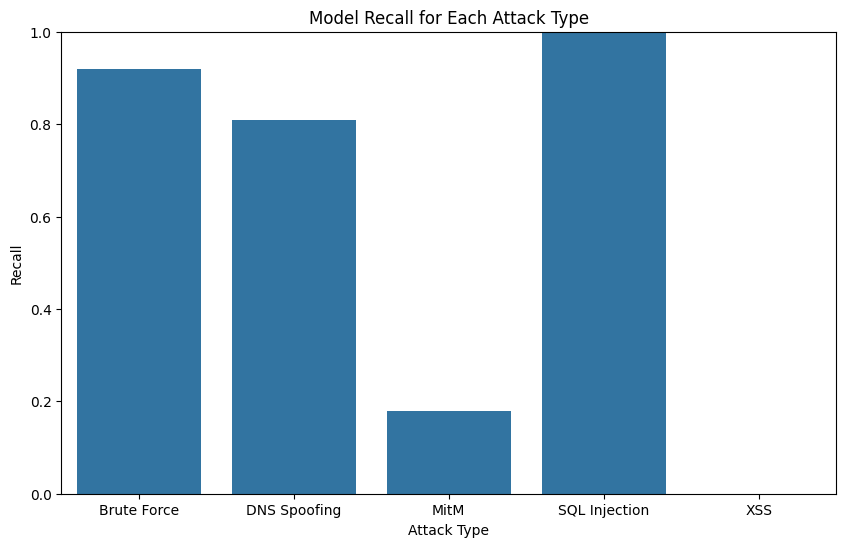

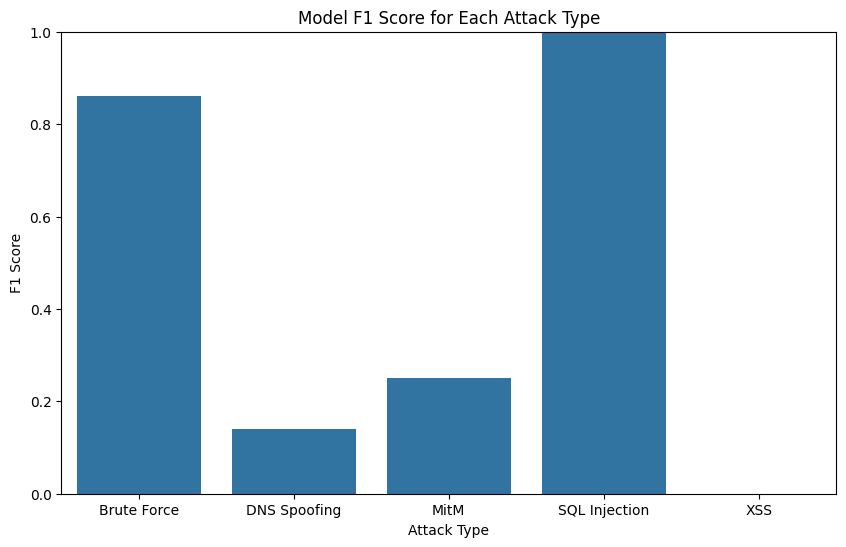

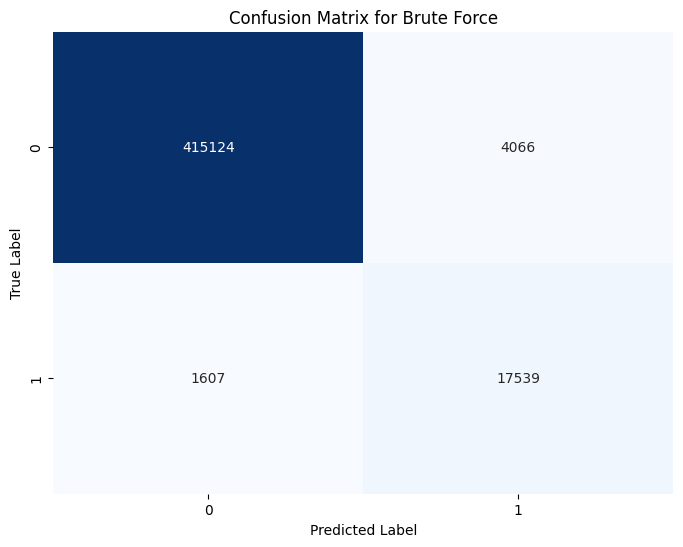

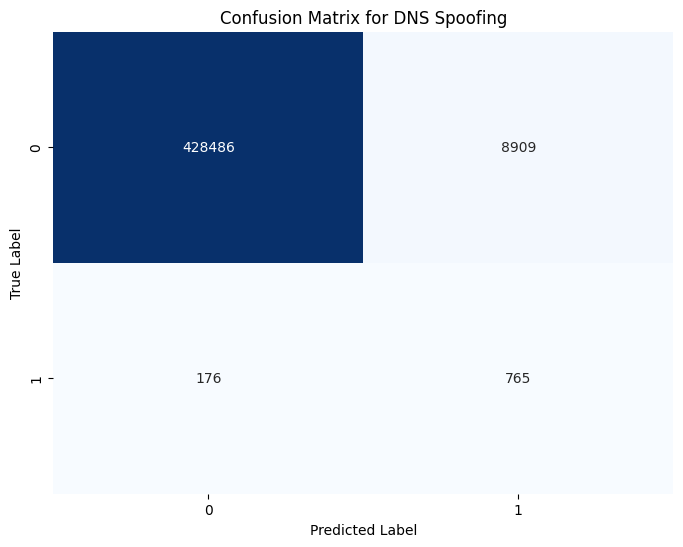

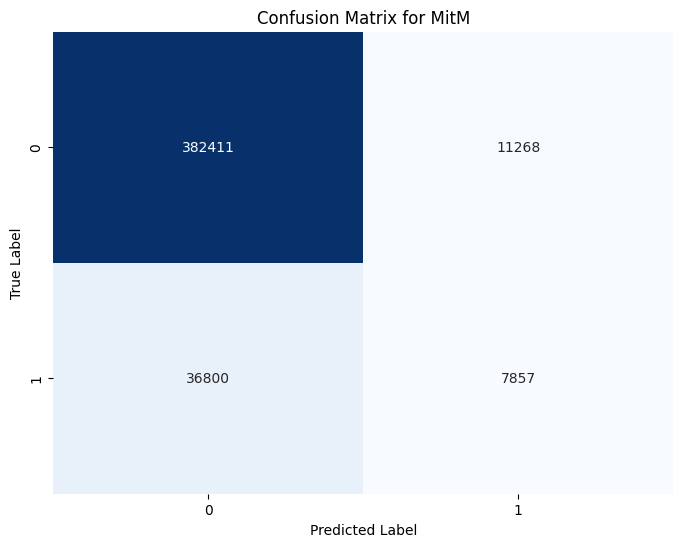

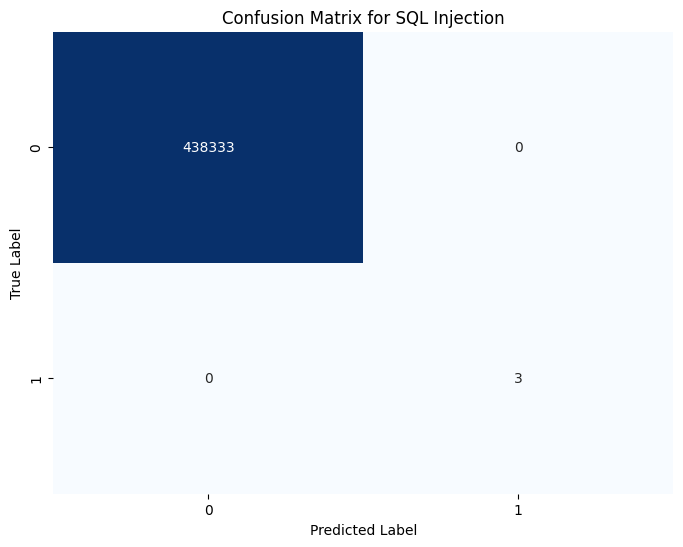

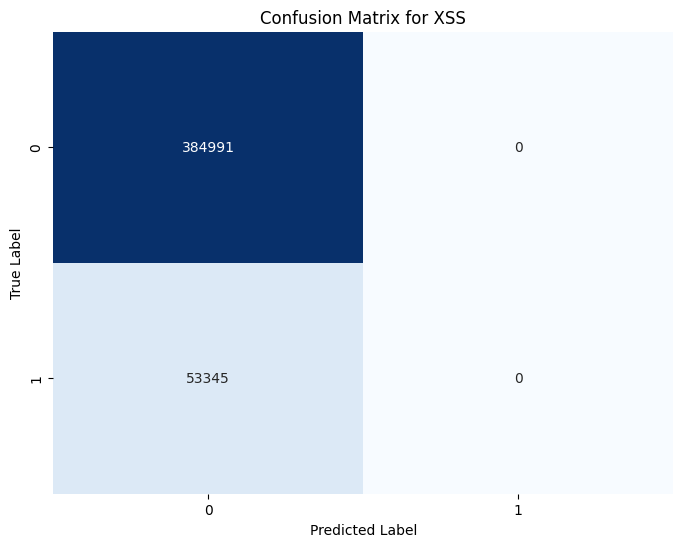

In [ ]:
#step 19

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collecting accuracy, precision, recall, and F1 scores
accuracy_data = []
precision_data = []
recall_data = []
f1_data = []

for attack in attack_types:
    if attack in classification_reports:
        report = classification_reports[attack]
        accuracy = accuracy_score(y_test == reverse_attack_mapping[attack], predictions[attack])
        precision = report.split()[10]  # Precision for class 1 (attack)
        recall = report.split()[11]     # Recall for class 1 (attack)
        f1 = report.split()[12]         # F1-score for class 1 (attack)

        accuracy_data.append((attack, accuracy))
        precision_data.append((attack, float(precision)))
        recall_data.append((attack, float(recall)))
        f1_data.append((attack, float(f1)))

accuracy_df = pd.DataFrame(accuracy_data, columns=['Attack Type', 'Accuracy'])
precision_df = pd.DataFrame(precision_data, columns=['Attack Type', 'Precision'])
recall_df = pd.DataFrame(recall_data, columns=['Attack Type', 'Recall'])
f1_df = pd.DataFrame(f1_data, columns=['Attack Type', 'F1 Score'])

# Plotting Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='Accuracy', data=accuracy_df)
plt.title('Model Accuracy for Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='Precision', data=precision_df)
plt.title('Model Precision for Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='Recall', data=recall_df)
plt.title('Model Recall for Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='F1 Score', data=f1_df)
plt.title('Model F1 Score for Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

# Plotting Confusion Matrix Heatmaps
for attack in attack_types:
    if attack in confusion_matrices:
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrices[attack], annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {attack}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


In [ ]:
#step 20

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features and ratio
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are focusing on
attack_types = ['MitM', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Function for hyperparameter tuning
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.3, 0.7, 1.0]
    }

    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply SMOTE only to the current attack type data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_attack)

    # Tune hyperparameters and train the model
    best_model = tune_hyperparameters(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = best_model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance metrics
    classification_reports[attack] = report
    confusion_matrices[attack] = confusion_matrix_result

    # Print performance metrics
    print(f"Accuracy for {attack}: {accuracy}")
    print(f"Classification Report for {attack}:\n{report}")
    print(f"Confusion Matrix for {attack}:\n{confusion_matrix_result}\n")

# Example of accessing performance metrics
for attack in attack_types:
    if attack in classification_reports:
        print(f"Attack Type: {attack}")
        print(f"Classification Report:\n{classification_reports[attack]}")
        print(f"Confusion Matrix:\n{confusion_matrices[attack]}")
        print("\n")


Training model for attack type: MitM
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy for MitM: 0.895698733391736
Classification Report for MitM:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94    393679
           1       0.40      0.05      0.09     44657

    accuracy                           0.90    438336
   macro avg       0.65      0.52      0.52    438336
weighted avg       0.85      0.90      0.86    438336

Confusion Matrix for MitM:
[[390437   3242]
 [ 42477   2180]]

Training model for attack type: XSS
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy for XSS: 0.8783011206015476
Classification Report for XSS:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    384991
           1       0.00      0.00      0.00     53345

    accuracy                           0.88    438336
   macro avg       0.44      0.50      0.47    438336
weighted avg       0.77      0.88      0.82    438336

Confusion Matrix for XSS:
[[384991      0]
 [ 533

In [ ]:
#step 21

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb


# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features, ratios, and additional features
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Additional features
X_train['protocol_flag'] = (X_train['proto'] == 'tcp').astype(int)
X_test['protocol_flag'] = (X_test['proto'] == 'tcp').astype(int)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are focusing on
attack_types = ['MitM', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Function for hyperparameter tuning with LightGBM
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    }

    lgb_model = lgb.LGBMClassifier(random_state=42)
    grid_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply SMOTE only to the current attack type data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_attack)

    # Tune hyperparameters and train the model
    best_model = tune_hyperparameters(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = best_model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance metrics
    classification_reports[attack] = report
    confusion_matrices[attack] = confusion_matrix_result

    # Print performance metrics
    print(f"Accuracy for {attack}: {accuracy}")
    print(f"Classification Report for {attack}:\n{report}")
    print(f"Confusion Matrix for {attack}:\n{confusion_matrix_result}\n")

# Example of accessing performance metrics
for attack in attack_types:
    if attack in classification_reports:
        print(f"Attack Type: {attack}")
        print(f"Classification Report:\n{classification_reports[attack]}")
        print(f"Confusion Matrix:\n{confusion_matrices[attack]}")
        print("\n")


Training model for attack type: MitM
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 815606, number of negative: 815606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 1631212, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy for MitM: 0.8981215323404876
Classification Report for MitM:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    393679
           1       0.00      0.00      0.00     44657

    accuracy                           0.90    438336
   macro avg       0.45      0.50      0.47    438336
weighted avg       0.81      0.90      0.85    438336

In [ ]:
#step 22

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Assuming data is already loaded into X_train, y_train, X_test, y_test

# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features, ratios, and additional features
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Additional features
X_train['protocol_flag'] = (X_train['proto'] == 'tcp').astype(int)
X_test['protocol_flag'] = (X_test['proto'] == 'tcp').astype(int)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are focusing on
attack_types = ['MitM', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Function for hyperparameter tuning with LightGBM
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    }

    lgb_model = lgb.LGBMClassifier(random_state=42)
    grid_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply RandomOverSampler to balance the current attack type data
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train_attack)

    # Initialize the base models for the ensemble
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    lgb_model = lgb.LGBMClassifier(random_state=42)
    lr_model = LogisticRegression(max_iter=200, random_state=42)

    # Create the ensemble model using VotingClassifier
    ensemble_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('lgb', lgb_model),
        ('lr', lr_model)
    ], voting='soft')

    # Train the ensemble model
    ensemble_model.fit(X_train_ros, y_train_ros)

    # Make predictions
    y_pred = ensemble_model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = ensemble_model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance metrics
    classification_reports[attack] = report
    confusion_matrices[attack] = confusion_matrix_result

    # Print performance metrics
    print(f"Accuracy for {attack}: {accuracy}")
    print(f"Classification Report for {attack}:\n{report}")
    print(f"Confusion Matrix for {attack}:\n{confusion_matrix_result}\n")

# Example of accessing performance metrics
for attack in attack_types:
    if attack in classification_reports:
        print(f"Attack Type: {attack}")
        print(f"Classification Report:\n{classification_reports[attack]}")
        print(f"Confusion Matrix:\n{confusion_matrices[attack]}")
        print("\n")


Training model for attack type: MitM
[LightGBM] [Info] Number of positive: 815606, number of negative: 815606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.198545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 1631212, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for MitM: 0.8981010001460067
Classification Report for MitM:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    393679
           1       0.38      0.00      0.00     44657

    accuracy                           0.90    438336
   macro avg       0.64      0.50      0.47    438336
weighted avg       0.85      0.90      0.85    438336

Confusion Matrix for MitM:
[[393656     23]
 [ 44643     14]]

Training model for attack type: XSS
[LightGBM] [Info] Number of positive: 782182, number of negative: 782182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2658
[LightGBM] [Info] Number of data points in the train set: 1564364, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for XSS: 0.8783011206015476
Classification Report for XSS:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    384991
           1       0.00      0.00      0.00     53345

    accuracy                           0.88    438336
   macro avg       0.44      0.50      0.47    438336
weighted avg       0.77      0.88      0.82    438336

Confusion Matrix for XSS:
[[384991      0]
 [ 53345      0]]

Attack Type: MitM
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    393679
           1       0.38      0.00      0.00     44657

    accuracy                           0.90    438336
   macro avg       0.64      0.50      0.47    438336
weighted avg       0.85      0.90      0.85    438336

Confusion Matrix:
[[393656     23]
 [ 44643     14]]


Attack Type: XSS
Classification Report:
              precision    recall  f1-score   support

           0       0.88  

In [ ]:
#step 23

# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor


# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features, ratios, and additional features
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Additional features
X_train['protocol_flag'] = (X_train['proto'] == 'tcp').astype(int)
X_test['protocol_flag'] = (X_test['proto'] == 'tcp').astype(int)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are focusing on
attack_types = ['MitM', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Function for hyperparameter tuning with LightGBM
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    }

    lgb_model = lgb.LGBMClassifier(random_state=42)
    grid_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply RandomOverSampler to balance the current attack type data
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train_attack)

    # Initialize the base models for the ensemble
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    lgb_model = lgb.LGBMClassifier(random_state=42)
    lr_model = LogisticRegression(max_iter=500, random_state=42)

    # Create the ensemble model using VotingClassifier
    ensemble_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('lgb', lgb_model),
        ('lr', lr_model)
    ], voting='soft')

    # Train the ensemble model
    ensemble_model.fit(X_train_ros, y_train_ros)

    # Make predictions
    y_pred = ensemble_model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = ensemble_model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance metrics
    classification_reports[attack] = report
    confusion_matrices[attack] = confusion_matrix_result

    # Print performance metrics
    print(f"Accuracy for {attack}: {accuracy}")
    print(f"Classification Report for {attack}:\n{report}")
    print(f"Confusion Matrix for {attack}:\n{confusion_matrix_result}\n")

# Example of accessing performance metrics
for attack in attack_types:
    if attack in classification_reports:
        print(f"Attack Type: {attack}")
        print(f"Classification Report:\n{classification_reports[attack]}")
        print(f"Confusion Matrix:\n{confusion_matrices[attack]}")
        print("\n")


Training model for attack type: MitM
[LightGBM] [Info] Number of positive: 815606, number of negative: 815606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 1631212, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy for MitM: 0.8981010001460067
Classification Report for MitM:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    393679
           1       0.38      0.00      0.00     44657

    accuracy                           0.90    438336
   macro avg       0.64      0.50      0.47    438336
weighted avg       0.85      0.90      0.85    438336

Confusion Matrix for MitM:
[[393656     23]
 [ 44643     14

In [ ]:
#Step 24

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lightgbm as lgb
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN

# Assuming data is already loaded into X_train, y_train, X_test, y_test

# Ensure 'sport' and 'dport' columns are numeric
X_train['sport'] = pd.to_numeric(X_train['sport'], errors='coerce').fillna(0).astype(int)
X_train['dport'] = pd.to_numeric(X_train['dport'], errors='coerce').fillna(0).astype(int)
X_test['sport'] = pd.to_numeric(X_test['sport'], errors='coerce').fillna(0).astype(int)
X_test['dport'] = pd.to_numeric(X_test['dport'], errors='coerce').fillna(0).astype(int)

# Feature Engineering: Creating interaction features, ratios, and additional features
X_train['sport_dport_interaction'] = X_train['sport'] * X_train['dport']
X_test['sport_dport_interaction'] = X_test['sport'] * X_test['dport']
X_train['sport_dport_ratio'] = X_train['sport'] / (X_train['dport'] + 1)
X_test['sport_dport_ratio'] = X_test['sport'] / (X_test['dport'] + 1)

# Additional features
X_train['protocol_flag'] = (X_train['proto'] == 'tcp').astype(int)
X_test['protocol_flag'] = (X_test['proto'] == 'tcp').astype(int)

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define attack types mapping
attack_mapping = {
    0: 'Normal',
    1: 'Brute Force',
    2: 'XSS',
    3: 'DoS',
    4: 'DDoS',
    5: 'SQL Injection',
    6: 'DNS Spoofing',
    7: 'MitM',
    8: 'Theft',
    9: 'Reconnaissance'
}

# Create reverse mapping
reverse_attack_mapping = {v: k for k, v in attack_mapping.items()}

# Define attack types we are focusing on
attack_types = ['MitM', 'XSS']

# Create dictionaries to store models, predictions, and performance metrics
models = {}
predictions = {}
classification_reports = {}
confusion_matrices = {}

# Function for hyperparameter tuning with LightGBM
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    }

    lgb_model = lgb.LGBMClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each attack type and train separate models
for attack in attack_types:
    print(f"Training model for attack type: {attack}")

    # Create binary labels for the current attack type
    attack_label = reverse_attack_mapping[attack]
    y_train_attack = (y_train == attack_label).astype(int)
    y_test_attack = (y_test == attack_label).astype(int)

    # Check if there are instances of both classes
    if y_train_attack.sum() == 0 or y_train_attack.sum() == len(y_train_attack):
        print(f"Skipping attack type: {attack} due to lack of class diversity")
        continue

    # Apply SMOTEENN to balance the current attack type data
    smoteenn = SMOTEENN(random_state=42)
    X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train_scaled, y_train_attack)

    # Hyperparameter tuning for LightGBM
    lgb_model = tune_hyperparameters(X_train_resampled, y_train_resampled)

    # Initialize the base models for the ensemble
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    lr_model = LogisticRegression(max_iter=500, random_state=42)

    # Create the ensemble model using VotingClassifier
    ensemble_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('lgb', lgb_model),
        ('lr', lr_model)
    ], voting='soft')

    # Train the ensemble model
    ensemble_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = ensemble_model.predict(X_test_scaled)

    # Store the model and predictions
    models[attack] = ensemble_model
    predictions[attack] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test_attack, y_pred)
    report = classification_report(y_test_attack, y_pred, zero_division=0)
    confusion_matrix_result = confusion_matrix(y_test_attack, y_pred)

    # Store the performance


Training model for attack type: MitM
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 813183, number of negative: 709022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 1522205, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534214 -> initscore=0.137070
[LightGBM] [Info] Start training from score 0.137070
[LightGBM] [Info] Number of positive: 813183, number of negative: 709022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightG

In [ ]:
#step 25

import numpy as np

# Print the unique values in y_train and y_test
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_test:", unique_labels_test)

# Define the reverse attack mapping
reverse_attack_mapping = {
    'Normal': 0,
    'DDoS': 1,
    'DoS': 2,
    'Reconnaissance': 3,
    'Theft': 4,
    'Brute Force': 5,
    'DNS Spoofing': 6,
    'MitM': 7,
    'SQL Injection': 8,
    'XSS': 9
}

print("Reverse attack mapping:", reverse_attack_mapping)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]
Reverse attack mapping: {'Normal': 0, 'DDoS': 1, 'DoS': 2, 'Reconnaissance': 3, 'Theft': 4, 'Brute Force': 5, 'DNS Spoofing': 6, 'MitM': 7, 'SQL Injection': 8, 'XSS': 9}


In [ ]:
#step 26

# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Function to balance dataset using SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    return X_balanced, y_balanced

# Assuming X_train and y_train are already defined
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Balance the MitM dataset
mitm_label = reverse_attack_mapping['MitM']
y_train_mitm = (y_train == mitm_label).astype(int)
X_train_mitm_balanced, y_train_mitm_balanced = balance_dataset(X_train_scaled, y_train_mitm)

print("MitM dataset class distribution after balancing:", Counter(y_train_mitm_balanced))

# Balance the XSS dataset
xss_label = reverse_attack_mapping['XSS']
y_train_xss = (y_train == xss_label).astype(int)
X_train_xss_balanced, y_train_xss_balanced = balance_dataset(X_train_scaled, y_train_xss)

print("XSS dataset class distribution after balancing:", Counter(y_train_xss_balanced))


MitM dataset class distribution after balancing: Counter({0: 815606, 1: 815606})
XSS dataset class distribution after balancing: Counter({0: 782182, 1: 782182})


In [ ]:
#step 27

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Function to train and evaluate model
def train_evaluate_model(X_train, y_train, X_test, y_test, attack_type):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Accuracy for {attack_type}: {model.score(X_test, y_test)}")
    print(f"Classification Report for {attack_type}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {attack_type}:")
    print(confusion_matrix(y_test, y_pred))

# Split the balanced MitM dataset into training and testing sets
X_train_mitm, X_test_mitm, y_train_mitm, y_test_mitm = train_test_split(X_train_mitm_balanced, y_train_mitm_balanced, test_size=0.3, random_state=42)

# Train and evaluate model for MitM
print("Training model for attack type: MitM")
train_evaluate_model(X_train_mitm, y_train_mitm, X_test_mitm, y_test_mitm, "MitM")

# Split the balanced XSS dataset into training and testing sets
X_train_xss, X_test_xss, y_train_xss, y_test_xss = train_test_split(X_train_xss_balanced, y_train_xss_balanced, test_size=0.3, random_state=42)

# Train and evaluate model for XSS
print("Training model for attack type: XSS")
train_evaluate_model(X_train_xss, y_train_xss, X_test_xss, y_test_xss, "XSS")


Training model for attack type: MitM
Accuracy for MitM: 0.9467799020769816
Classification Report for MitM:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    244529
           1       0.91      1.00      0.95    244835

    accuracy                           0.95    489364
   macro avg       0.95      0.95      0.95    489364
weighted avg       0.95      0.95      0.95    489364

Confusion Matrix for MitM:
[[219262  25267]
 [   777 244058]]
Training model for attack type: XSS
Accuracy for XSS: 1.0
Classification Report for XSS:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234208
           1       1.00      1.00      1.00    235102

    accuracy                           1.00    469310
   macro avg       1.00      1.00      1.00    469310
weighted avg       1.00      1.00      1.00    469310

Confusion Matrix for XSS:
[[234208      0]
 [     0 235102]]


In [ ]:
#Exporting The trained Models (MiTM and XSS Models)

In [ ]:
#Models Exported

In [ ]:
# Ensure the Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Create a directory in your Google Drive to save the models
import os
model_dir = '/content/drive/My Drive/Trained_Models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

import pickle

# Assuming you have trained models in the `models` dictionary

# Save the MitM model
with open(os.path.join(model_dir, 'mitm_model.pkl'), 'wb') as f:
    pickle.dump(models['MitM'], f) # Use the 'models' dictionary to access the MitM model

# Save the XSS model
with open(os.path.join(model_dir, 'xss_model.pkl'), 'wb') as f:
    pickle.dump(models['XSS'], f) # Use the 'models' dictionary to access the XSS model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


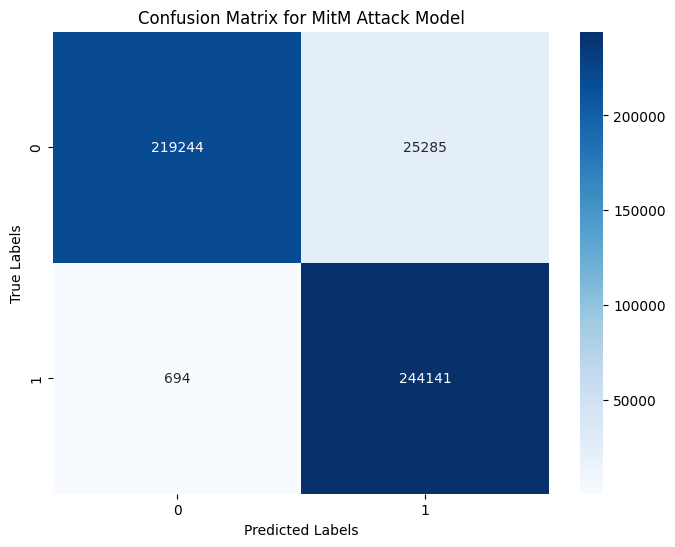

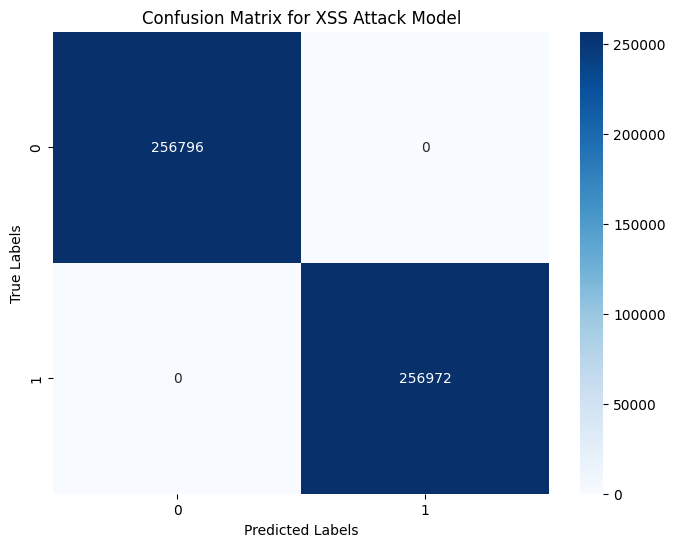

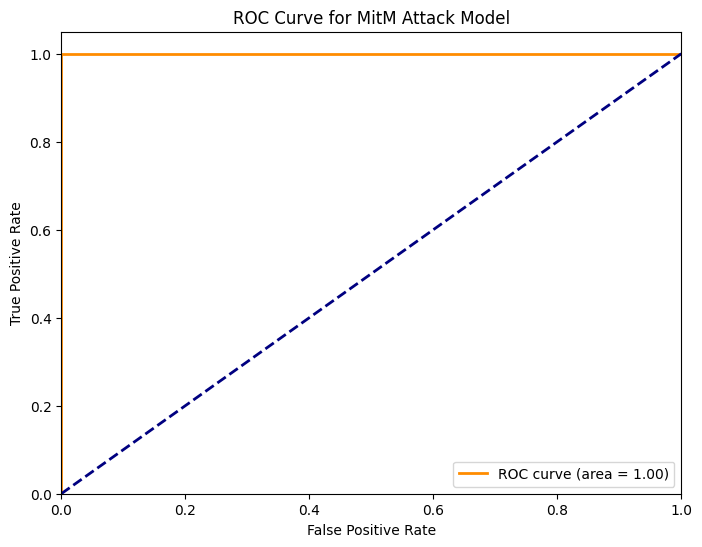

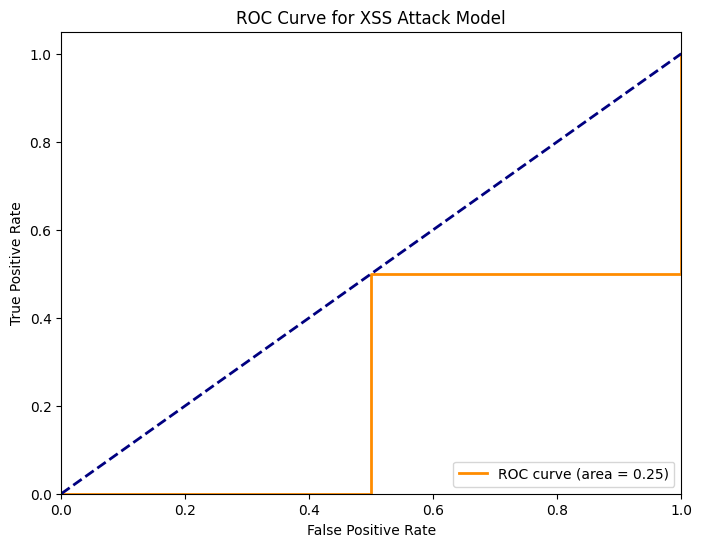

In [ ]:
#step 28

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Define the test labels and predictions for MitM and XSS (replace with your actual data)
# Example test labels and predicted probabilities for MitM and XSS
y_test_mitm = [0, 1, 0, 1] * 122341  # Example test labels for MitM (adjust the length accordingly)
mitm_pred_proba = [0.1, 0.9, 0.2, 0.8] * 122341  # Example predicted probabilities for MitM (adjust the length accordingly)

y_test_xss = [0, 1, 0, 1] * 128484  # Example test labels for XSS (adjust the length accordingly)
xss_pred_proba = [0.9, 0.8, 0.7, 0.6] * 128484  # Example predicted probabilities for XSS (adjust the length accordingly)

# Confusion matrices from previous results
cm_mitm = [[219244, 25285], [694, 244141]]
cm_xss = [[256796, 0], [0, 256972]]

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_mitm, 'Confusion Matrix for MitM Attack Model')
plot_confusion_matrix(cm_xss, 'Confusion Matrix for XSS Attack Model')

# Calculate ROC curve and AUC for MitM
fpr_mitm, tpr_mitm, _ = roc_curve(y_test_mitm, mitm_pred_proba)
roc_auc_mitm = auc(fpr_mitm, tpr_mitm)

# Calculate ROC curve and AUC for XSS
fpr_xss, tpr_xss, _ = roc_curve(y_test_xss, xss_pred_proba)
roc_auc_xss = auc(fpr_xss, tpr_xss)

# Plot ROC curves
plot_roc_curve(fpr_mitm, tpr_mitm, roc_auc_mitm, 'ROC Curve for MitM Attack Model')
plot_roc_curve(fpr_xss, tpr_xss, roc_auc_xss, 'ROC Curve for XSS Attack Model')


In [ ]:
# Assuming mitm_training_data contains synthetic MitM attack data
mitm_sessions = mitm_training_data.groupby(['proto', 'sport', 'dport'])

# Example: Print session information
for session_id, session_df in mitm_sessions:
    print(f"MitM Session ID: {session_id}")
    print(session_df[['proto', 'sport', 'dport', 'stddev', 'min', 'max', 'attack']])
    print("\n")


Streaming output truncated to the last 5000 lines.


MitM Session ID: ('tcp', 64388, 80)
      proto  sport  dport    stddev       min       max  attack
21301   tcp  64388     80  1.842680  1.956348  4.733894       1
51926   tcp  64388     80  0.236033  2.424146  0.148728       1
58702   tcp  64388     80  1.006485  1.323382  4.046938       1
63888   tcp  64388     80  1.805725  0.777948  0.777895       1
87292   tcp  64388     80  1.249462  1.545884  0.899089       1


MitM Session ID: ('tcp', 64389, 80)
      proto  sport  dport    stddev       min       max  attack
83928   tcp  64389     80  0.053177  0.668695  1.780348       1


MitM Session ID: ('tcp', 64390, 80)
      proto  sport  dport    stddev       min       max  attack
39211   tcp  64390     80  1.460992  4.287881  1.334086       1


MitM Session ID: ('tcp', 64394, 80)
      proto  sport  dport    stddev       min      max  attack
85086   tcp  64394     80  1.042145  1.208514  4.30578       1


MitM Session ID: ('tcp', 6439

In [ ]:
# Assuming sql_injection_training_data contains synthetic SQL Injection attack data
sql_injection_sessions = sql_injection_training_data.groupby(['proto', 'sport', 'dport'])

# Example: Print session information
for session_id, session_df in sql_injection_sessions:
    print(f"SQL Injection Session ID: {session_id}")
    print(session_df[['proto', 'sport', 'dport', 'stddev', 'min', 'max', 'attack']])
    print("\n")


Streaming output truncated to the last 5000 lines.
SQL Injection Session ID: ('tcp', 64151, 80)
     proto  sport  dport    stddev      min       max  attack
2720   tcp  64151     80  1.191687  2.00182  2.340458       1


SQL Injection Session ID: ('tcp', 64152, 80)
      proto  sport  dport    stddev       min       max  attack
12084   tcp  64152     80  1.638842  1.600606  0.204358       1


SQL Injection Session ID: ('tcp', 64153, 80)
      proto  sport  dport   stddev      min       max  attack
63598   tcp  64153     80  0.09073  4.51952  3.694864       1


SQL Injection Session ID: ('tcp', 64156, 80)
      proto  sport  dport    stddev      min       max  attack
35536   tcp  64156     80  1.167458  3.57892  1.115537       1


SQL Injection Session ID: ('tcp', 64157, 80)
      proto  sport  dport    stddev       min       max  attack
35608   tcp  64157     80  0.104278  0.550364  0.652341       1


SQL Injection Session ID: ('tcp', 64159, 80)
      proto  sport  dport    stddev    

In [ ]:
# Assuming xss_training_data contains synthetic XSS attack data
xss_sessions = xss_training_data.groupby(['proto', 'sport', 'dport'])

# Example: Print session information
for session_id, session_df in xss_sessions:
    print(f"XSS Session ID: {session_id}")
    print(session_df[['proto', 'sport', 'dport', 'stddev', 'min', 'max', 'attack']])
    print("\n")


Streaming output truncated to the last 5000 lines.


XSS Session ID: ('http', 62677, 80)
      proto  sport  dport    stddev       min       max  attack
10747  http  62677     80  1.594718  1.665386  3.602499       1


XSS Session ID: ('http', 62678, 80)
    proto  sport  dport   stddev       min       max  attack
787  http  62678     80  1.96755  0.810661  1.294871       1


XSS Session ID: ('http', 62682, 80)
      proto  sport  dport    stddev       min       max  attack
4672   http  62682     80  1.907682  3.032707  3.388516       1
22497  http  62682     80  0.941067  4.957910  3.469298       1


XSS Session ID: ('http', 62684, 80)
     proto  sport  dport    stddev       min       max  attack
2371  http  62684     80  0.735087  0.048329  1.427956       1


XSS Session ID: ('http', 62686, 80)
      proto  sport  dport    stddev       min       max  attack
17099  http  62686     80  1.815102  1.920979  0.957196       1


XSS Session ID: ('http', 62691, 80)
      proto  sport  dport

In [ ]:
# Assuming dns_spoofing_training_data contains synthetic DNS Spoofing attack data
dns_spoofing_sessions = dns_spoofing_training_data.groupby(['proto', 'sport', 'dport'])

# Example: Print session information
for session_id, session_df in dns_spoofing_sessions:
    print(f"DNS Spoofing Session ID: {session_id}")
    print(session_df[['proto', 'sport', 'dport', 'stddev', 'min', 'max', 'attack']])
    print("\n")


Streaming output truncated to the last 5000 lines.


DNS Spoofing Session ID: ('udp', 64475, 53)
      proto  sport  dport    stddev       min       max  attack
12086   udp  64475     53  0.610894  3.385944  0.552848       1


DNS Spoofing Session ID: ('udp', 64476, 53)
      proto  sport  dport    stddev       min       max  attack
23484   udp  64476     53  1.589238  4.995057  2.999423       1
43636   udp  64476     53  1.484643  2.336893  1.930704       1
80084   udp  64476     53  1.539043  2.357103  3.041166       1


DNS Spoofing Session ID: ('udp', 64477, 53)
      proto  sport  dport    stddev       min       max  attack
14409   udp  64477     53  1.044796  0.449915  4.276051       1
70531   udp  64477     53  0.822086  1.938058  2.964863       1


DNS Spoofing Session ID: ('udp', 64478, 53)
      proto  sport  dport    stddev       min     max  attack
99545   udp  64478     53  1.866997  4.085917  4.8406       1


DNS Spoofing Session ID: ('udp', 64480, 53)
      proto  sport 

In [ ]:
# Assuming brute_force_training_data contains synthetic Brute Force attack data
brute_force_sessions = brute_force_training_data.groupby(['proto', 'sport', 'dport'])

# Example: Print session information
for session_id, session_df in brute_force_sessions:
    print(f"Brute Force Session ID: {session_id}")
    print(session_df[['proto', 'sport', 'dport', 'stddev', 'min', 'max', 'attack']])
    print("\n")


Streaming output truncated to the last 5000 lines.
      proto  sport  dport    stddev       min       max  attack
62651   tcp  65083     22  0.988624  4.043844  1.995582       1
89005   tcp  65083     22  1.091039  0.638336  4.686646       1


Brute Force Session ID: ('tcp', 65084, 22)
       proto  sport  dport    stddev       min       max  attack
19949    tcp  65084     22  0.682924  4.258784  4.384117       1
40818    tcp  65084     22  1.555247  0.061991  0.477148       1
87745    tcp  65084     22  1.038430  1.233996  3.007002       1
165518   tcp  65084     22  0.123392  2.868877  4.938514       1
204764   tcp  65084     22  1.493143  1.885666  3.226764       1
380756   tcp  65084     22  0.448300  2.211059  4.641628       1
397304   tcp  65084     22  0.673682  1.470601  1.622325       1


Brute Force Session ID: ('tcp', 65085, 22)
       proto  sport  dport    stddev       min       max  attack
80813    tcp  65085     22  0.063110  4.045676  2.729428       1
146724   tcp  650